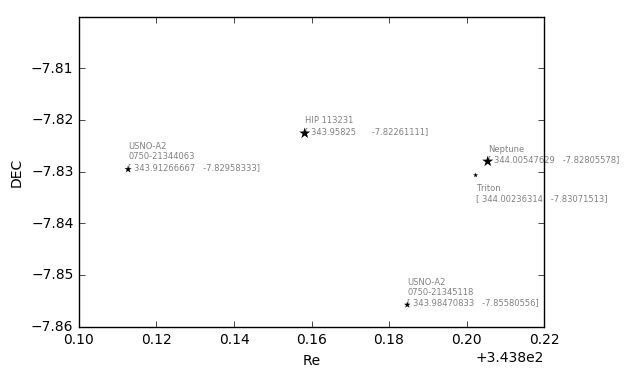

In [8]:
import numpy as np
from sympy import *
from astropy import wcs
from astropy.io import fits
import matplotlib.pyplot as plt

#regard the HIP 113231 as reference point
crpix1 =  515 # X of reference pixel
crpix2 =  653 # Y of reference pixel
crval1 =  343.95825 # RA of reference pixel
crval2 =  -7.82261111 #DEC of reference pixel

#symbol the values that needed to convert RA,DEC to X,Y and vice versa
cd1_1 = Symbol('cd1_1') # RA deg per column pixel
cd1_2 = Symbol('cd1_2') # RA deg per row pixel
cd2_1 = Symbol('cd2_1') # DEC deg per column pixel
cd2_2 = Symbol('cd2_2') # DEC deg per row pixel


# solve above values by the three stars' coordinate
#(the function is taken from A. Crider at https://acrider.wordpress.com/2015/02/04/revised-python-code-for-converting-ra-dec-to-x-y/)
det = cd1_1 * cd2_2 - cd1_2 * cd2_1

cdinv11 = cd2_2 / det
cdinv12 = -cd1_2 / det
cdinv21 = -cd2_1 / det
cdinv22 = cd1_1 / det

galaxy_RA1 = 343.91266667
galaxy_DEC1 = -7.82958333
galaxy_X1 = 99.3
galaxy_Y1 = 424
galaxy_RA2 = 343.98470833
galaxy_DEC2 = -7.85580556
galaxy_X2 = 848.3
galaxy_Y2 = 433.4

ra0 = crval1 / 180.0 * np.pi
dec0 = crval2 / 180.0 * np.pi

ra1 = galaxy_RA1 / 180.0 * np.pi
dec1 = galaxy_DEC1 / 180.0 * np.pi
ra2 = galaxy_RA2 / 180.0 * np.pi
dec2 = galaxy_DEC2 / 180.0 * np.pi

bottom1 = np.sin(dec1)*np.sin(dec0) + np.cos(dec1)*np.cos(dec0)*np.cos(ra1-ra0)
bottom2 = np.sin(dec2)*np.sin(dec0) + np.cos(dec2)*np.cos(dec0)*np.cos(ra2-ra0)

xi1 = np.cos(dec1) * np.sin(ra1-ra0) / bottom1
eta1 = (np.sin(dec1)*np.cos(dec0) - np.cos(dec1)*np.sin(dec0)*np.cos(ra1-ra0)) / bottom1
xi1 = xi1 * 180.0 / np.pi
eta1 = eta1 * 180.0 / np.pi
xi2 = np.cos(dec2) * np.sin(ra2-ra0) / bottom2
eta2 = (np.sin(dec2)*np.cos(dec0) - np.cos(dec2)*np.sin(dec0)*np.cos(ra2-ra0)) / bottom2
xi2 = xi2 * 180.0 / np.pi
eta2 = eta2 * 180.0 / np.pi

Equ1 = cdinv11 * xi1 + cdinv12 * eta1 + crpix1 -galaxy_X1
Equ2 = cdinv21 * xi1 + cdinv22 * eta1 + crpix2 -galaxy_Y1
Equ3 = cdinv11 * xi2 + cdinv12 * eta2 + crpix1 -galaxy_X2
Equ4 = cdinv21 * xi2 + cdinv22 * eta2 + crpix2 -galaxy_Y2

cd = np.array(solve([Equ1, Equ2, Equ3, Equ4],[cd1_1, cd1_2, cd2_1, cd2_2]),dtype='float64')

#by the solved result,convert the pixel coordinates on the image to equatorial coordinates
w = wcs.WCS(naxis=2)

w.wcs.crpix = [crpix1, crpix2]
w.wcs.cd = np.array([[cd[0][0], cd[0][1]],[cd[0][2], cd[0][3]]])
w.wcs.crval = [crval1, crval2]
w.wcs.ctype = ["RA---TAN", "DEC--TAN"]

pixcoor = np.array([[515.0,653.0], [99.3, 424.0], [848.3, 433.4],[977.0,770.3],[954.0,734.0]], np.float)

# Convert pixel coordinates to world coordinates
world = w.wcs_pix2world(pixcoor, 1)

#plot the result
x_coor = np.array([world[0][0],world[1][0],world[2][0],world[3][0],world[4][0]])
y_coor = np.array([world[0][1],world[1][1],world[2][1],world[3][1],world[4][1]])
plt.scatter(x_coor[0],y_coor[0],marker='*', color = 'k', edgecolor='none', s=70, alpha=1)
plt.scatter(x_coor[3],y_coor[3],marker='*', color = 'k', edgecolor='none', s=70, alpha=1)
plt.scatter(x_coor[1],y_coor[1],marker='*', color = 'k', edgecolor='none', s=30, alpha=1)
plt.scatter(x_coor[2],y_coor[2],marker='*', color = 'k', edgecolor='none', s=25, alpha=1)
plt.scatter(x_coor[4],y_coor[4],marker='*', color = 'k', edgecolor='none', s=15, alpha=1)

plt.text(world[0][0],world[0][1],'HIP 113231\n'+np.str(world[0]),fontsize=6,color='k',alpha=0.5)
plt.text(world[1][0],world[1][1],'USNO-A2\n0750-21344063\n'+np.str(world[1]),fontsize=6,color='k',alpha=0.5)
plt.text(world[2][0],world[2][1],'USNO-A2\n0750-21345118\n'+np.str(world[2]),fontsize=6,color='k',alpha=0.5)
plt.text(world[3][0],world[3][1],'Neptune\n'+np.str(world[3]),fontsize=6,color='k',alpha=0.5)
plt.text(world[4][0],world[4][1]-0.005,'Triton\n'+np.str(world[4]),fontsize=6,color='k',alpha=0.5)
plt.xlabel('Re')
plt.ylabel('DEC')

plt.show()

# Convert the same coordinates back to pixel coordinates.
#pixcrd2 = w.wcs_world2pix(world, 1)
#print(pixcrd2)



In [39]:
from astropy.coordinates import SkyCoord

coor = SkyCoord('22h55m39.04s', '-7d49m46.5s', frame='icrs')
print(coor)

<SkyCoord (ICRS): (ra, dec) in deg
    (343.91266667, -7.82958333)>
